## About Dataset

## Gender Recognition by Voice and Speech Analysis

This database was created to identify a voice as male or female, based upon acoustic properties of the voice and speech. The dataset consists of 3,168 recorded voice samples, collected from male and female speakers. The voice samples are pre-processed by acoustic analysis in R using the seewave and tuneR packages, with an analyzed frequency range of 0hz-280hz (human vocal range).



The following acoustic properties of each voice are measured and included within the CSV:



|Feature|Description|
|-----|-----|
|meanfreq| mean frequency (in kHz)|
|sd| standard deviation of frequency|
|median| median frequency (in kHz)|
|Q25| first quantile (in kHz)|
|Q75| third quantile (in kHz)|
|IQR| interquantile range (in kHz)|
|skew| skewness (see note in specprop description)|
|kurt| kurtosis (see note in specprop description)|
|sp.ent| spectral entropy|
|sfm| spectral flatness|
|mode| mode frequency|
|centroid| frequency centroid (see specprop)|
|peakf| peak frequency (frequency with highest energy)|
|meanfun| average of fundamental frequency measured across acoustic signal|
|minfun| minimum fundamental frequency measured across acoustic signal|
|maxfun| maximum fundamental frequency measured across acoustic signal|
|meandom| average of dominant frequency measured across acoustic signal|
|mindom| minimum of dominant frequency measured across acoustic signal|
|maxdom| maximum of dominant frequency measured across acoustic signal|
|dfrange| range of dominant frequency measured across acoustic signal|
|modindx| modulation index. Calculated as the accumulated absolute difference between adjacent measurements of fundamental               frequencies divided by the frequency range|
|label| male or female|

## Importing all the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

## Loading the dataset

In [2]:
df = pd.read_csv('voice.csv')
df.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


## Task 1: Check the correlation between each feature and also check whether there is any null values.

In [3]:
df.isnull().sum()

meanfreq    0
sd          0
median      0
Q25         0
Q75         0
IQR         0
skew        0
kurt        0
sp.ent      0
sfm         0
mode        0
centroid    0
meanfun     0
minfun      0
maxfun      0
meandom     0
mindom      0
maxdom      0
dfrange     0
modindx     0
label       0
dtype: int64

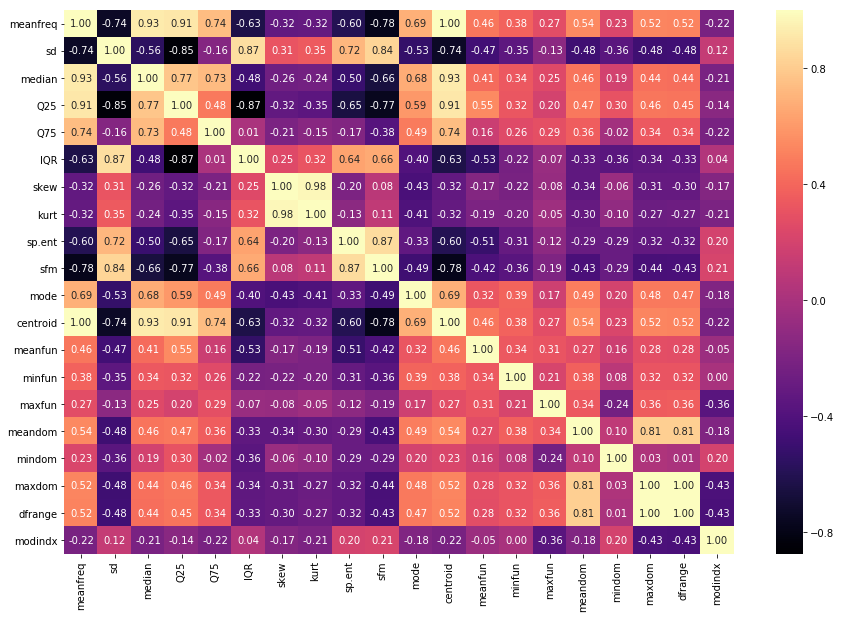

In [4]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='magma')

## Task 2 :  Print total number of labels. Also print the number of Male and Female labels respectively.

In [5]:
df['label'].value_counts().sum()


3168

In [6]:
df['label'].value_counts()

male      1584
female    1584
Name: label, dtype: int64

## Task 3: Label encode the target variable (i.e. male as 1 and female as 0).

In [7]:
df['label']=df['label'].replace('male',1)
df['label']=df['label'].replace('female',0)


In [8]:
df['label'].head()

0    1
1    1
2    1
3    1
4    1
Name: label, dtype: int64

## Task 4: Scale all the independent features and also split the dataset into training and testing set.

In [9]:
X=df.drop('label',1)
y=df['label']

In [10]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=1,test_size=0.2)


In [11]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
X_train=scale.fit_transform(X_train)
X_test=scale.transform(X_test)

## Task 5: Build model with SVC classifier keeping default Linear kernel and calculate accuracy score.

In [12]:
classifier=SVC(kernel = 'linear' , random_state = 0)
classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_test)

from sklearn.metrics import confusion_matrix,accuracy_score
print('Accuracy Score')
print(accuracy_score(y_test,y_pred))
print('confusion matrix ')
print(confusion_matrix(y_test,y_pred))

Accuracy Score
0.9779179810725552
confusion matrix 
[[305   6]
 [  8 315]]


## Task 6: Build SVC classifier model with polynomial kernel and calculate accuracy score

In [13]:
classifier=SVC(kernel = 'poly' , random_state = 0)
classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_test)

from sklearn.metrics import confusion_matrix,accuracy_score
print('Accuracy Score')
print(accuracy_score(y_test,y_pred))
print('confusion matrix ')
print(confusion_matrix(y_test,y_pred))

Accuracy Score
0.9589905362776026
confusion matrix 
[[290  21]
 [  5 318]]


## Task 7: Build SVM model with rbf kernel.

In [14]:
classifier=SVC(kernel = 'rbf' , random_state = 0)
classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_test)

from sklearn.metrics import confusion_matrix,accuracy_score
print('Accuracy Score')
print(accuracy_score(y_test,y_pred))
print('confusion matrix ')
print(confusion_matrix(y_test,y_pred))

Accuracy Score
0.9763406940063092
confusion matrix 
[[304   7]
 [  8 315]]


## Task 8: Remove Correlated Features.

As we have learned earlier one of the assumptions of Logistic Regression model is that the independent features should not be correlated to each other(i.e Multicollinearity).We will find the features that have a correlation higher that 0.95 and remove the same so that the assumption for logistic regression model is satisfied..

In [15]:
#au_corr=df1[abs(df1.corr())>0.75].unstack().sort_values(kind='quicksort')
au_corr= df.drop('label',1).corr().abs().unstack()
au_corr=au_corr[(au_corr>0.95) & (au_corr!=1)]
au_corr=au_corr.drop_duplicates()
#au_corr=au_corr.sort_values(ascending=False)
print(au_corr)


skew    kurt       0.977020
maxdom  dfrange    0.999838
dtype: float64


In [16]:
df.drop(['kurt','dfrange'],1,inplace=True)

## Task 9: Split the newly created data frame into train and test set, scale the features and apply SVM model with rbf kernel to newly created dataframe.

In [17]:
X=df.drop('label',1)
y=df['label']
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=1,test_size=0.2)

from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
X_train=scale.fit_transform(X_train)
X_test=scale.transform(X_test)

classifier=SVC(kernel = 'rbf' , random_state = 0)
classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_test)

from sklearn.metrics import confusion_matrix,accuracy_score
print('Accuracy Score')
print(accuracy_score(y_test,y_pred))
print('confusion matrix ')
print(confusion_matrix(y_test,y_pred))


Accuracy Score
0.9810725552050473
confusion matrix 
[[307   4]
 [  8 315]]


## Task 10: Do Hyperparameter Tuning using GridSearchCV and evaluate the model on test data.

In [ ]:
from sklearn.model import GridSearchCV
params_dict={'C':[0.001,0.01,0.1,1,10,100],'gamma':[0.001,0.01,0.1,1,10,100],'kernel':['linear','rbf']}
clf=GridSearchCV(estimator=SVC(),param_grid)